In [1]:
# Jump-Start for the Bank Marketing Study
# as described in Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python (Miller 2015)

# jump-start code revised by Thomas W. Milller (2018/10/07)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/auto_examples/classification/
#   plot_classifier_comparison.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.score
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LogisticRegression.html
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#  sklearn.model_selection.KFold.html

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

In [3]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [4]:
# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [5]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [6]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

In [8]:
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)


In [9]:
# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

In [10]:
# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [11]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

In [12]:
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

(4521, 4)


In [13]:
# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

In [14]:
features = model_data[:,:3]
output = model_data[:,-1]

# Initial Exploratory Analysis

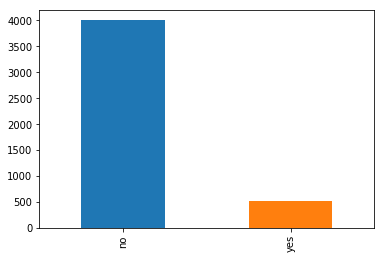

In [60]:
bank['response'].value_counts().plot(kind='bar')

it looks as though there is a small amount of individuals that have responded to the campaign. let's look at the %.

In [61]:
(response == 1).sum() / len(response * 100)

0.11523999115239991

In [17]:
##Around 11.5% responded yes to the campaign. let's look at some of the demographics of ones that said yes

yesresponse = bank.loc[bank['response'] == 'yes']

yesresponse.groupby('response').mean()

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1A818E438>,
      dtype=object)

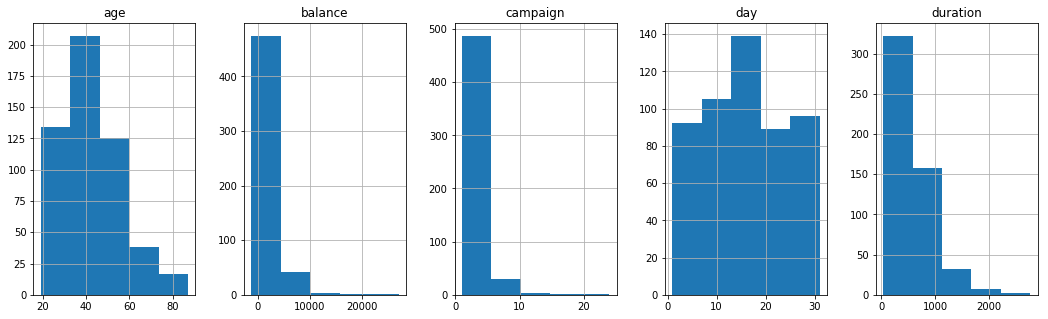

In [18]:
##Average age is around 42.9 years old, average days since contact of around 15.65 and contacted around 2.26 times
##I want to look a histogram of the age, balance, day, campaign and duration to see the normality of the data

distro = yesresponse[['age', 'balance', 'day', 'campaign', 'duration']]

distro.hist( bins = 5, figsize = (18,5), layout=(1,5))

All the indiduals that had said yes seem to have low balances (below 10k), very low duration, and very low number of contacts during the campaign. I want to see the individuals below a 5 campai

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1A854A400>,
      dtype=object)

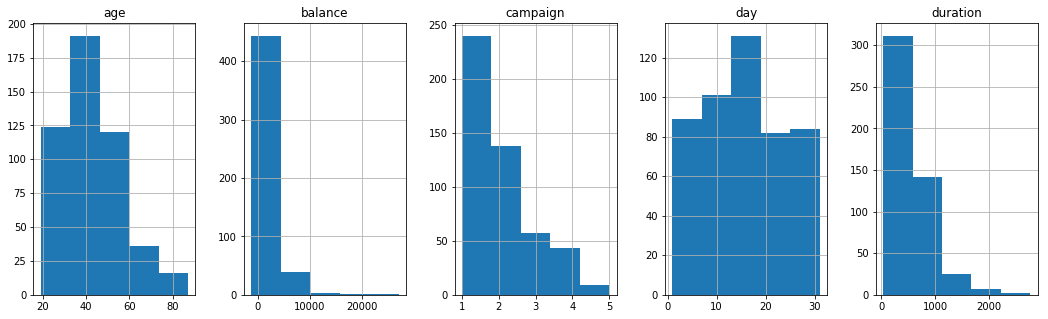

In [19]:
distro2 = distro.loc[distro['campaign'] <= 5]

distro2.hist( bins = 5, figsize = (18,5), layout=(1,5))

Let's filter this even more to see ones with a balance of less than or equal to 5k and a duration of less than or equal to 1000. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0A445DCC0>,
      dtype=object)

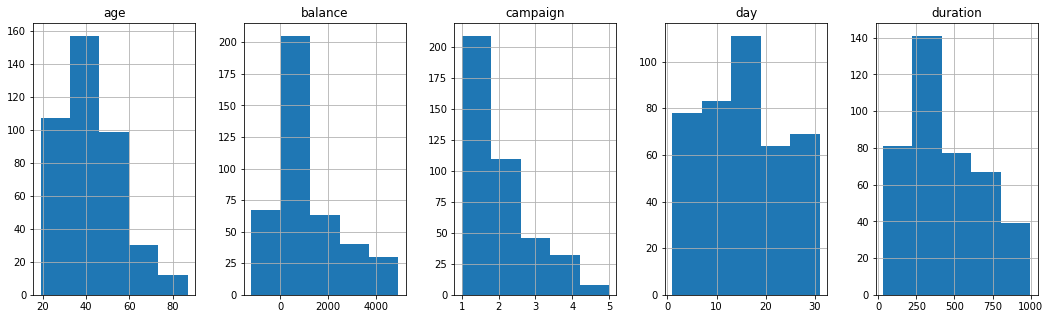

In [59]:
distro3 = distro2.loc[distro2['balance'] <= 5000]

distro3 = distro3.loc[distro3['duration']<=1000]

distro3.hist( bins = 5, figsize = (18,5), layout=(1,5))

Even though there is still skewness within the data, the normality of the data seems better for both balance and duration for the same age group on average. 

# Logistic Regression Modelling method

In [31]:
# importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# spliting the dataset between train and test. 
# training dataset is 70% and test data is 30%
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.30, random_state=42)

In [33]:
# Logistic Regression classifier using scikit learn
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# k fold cross validation where k=5
# validation set is prepared from the training data internally by scikit learn.

k=5
logistic_scores = cross_val_score(clf, X_train, y_train, cv=k)

In [35]:
# calculate the accuracy and standard deviation in the accuracy
logistic_accuracy = logistic_scores.mean()
logistic_std = logistic_scores.std()

print("Training Accuracy on logistic regression: %0.2f (+/- %0.2f)" % (logistic_accuracy, logistic_std * 2))

Training Accuracy on logistic regression: 0.88 (+/- 0.00)


This means that logsitic regression model is 88% accurately trained and with 0 standard deviation on the training data.

In [36]:
# test predictions
y_predict = clf.predict(X_test)

In [37]:
print('Test accuracy on logistic regression: %0.2f' % clf.score(X_test, y_test))

Test accuracy on logistic regression: 0.89


In [38]:
# ROC plot
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)


C:\Users\vtika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


the warning tells us that model is too much biased but since the accuracy is good, that means training data itself is biased. there are 4000 records with no as the response and 500 records with yes as response.

In [23]:
print('no count: ', bank[bank['response']=='no'].count()[0])
print('yes count: ', bank[bank['response']=='yes'].count()[0])


no count:  4000
yes count:  521


# Naive Bayes Classifier modelling technique

In [24]:
# importing the naive bayes module
from sklearn.naive_bayes import GaussianNB

In [25]:
# gaussian naive bayes model instance
gnb = GaussianNB()

# training on the training data
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [26]:
# k fold cross validation where k=5
# validation set is prepared from the training data internally by scikit learn.

k=5
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=k)

In [27]:
# calculate the accuracy and standard deviation in the accuracy
gnb_accuracy = gnb_scores.mean()
gnb_std = gnb_scores.std()

print("Training Accuracy on gnb: %0.2f (+/- %0.2f)" % (gnb_accuracy, gnb_std * 2))

Training Accuracy on gnb: 0.87 (+/- 0.01)


In [28]:
# test predictions
y_predict = gnb.predict(X_test)

In [29]:
print('Test accuracy on gnb: %0.2f' % gnb.score(X_test, y_test))

Test accuracy on gnb: 0.87


In [30]:
# ROC plot
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=2)


C:\Users\vtika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


the warning tells us that model is too much biased but since the accuracy is good, that means training data itself is biased. there are 4000 records with no as the response and 500 records with yes as response.

In [157]:
print('no count: ', bank[bank['response']=='no'].count()[0])
print('yes count: ', bank[bank['response']=='yes'].count()[0])


no count:  4000
yes count:  521


Since ROC cant be compared as the training data is heavily biased for one class, training accuracy can be a good criteria to evaluate the model. Training accuracy on logistic regression is 88% and 87% on gaussian naive bayes. hence logistic regression is just 1% better than naive bayes. Also logistic regression performs much better on test data, but we cant use test data for comparison. training accuracy is actually the mean of training + validation accuracy